# Telecom Customer Churn – Exploratory Data Analysis

In [1]:
# Import Required Libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Database connection parameters
db_config = {
    'user': 'root',
    'password': '12345',
    'host': 'localhost',
    'database': 'telco_customer_db'
}

# Create a connection to the database
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

# Load data from the database into a pandas DataFrame
df = pd.read_sql('SELECT * FROM telco_customer_churn', con=engine)

### Initial Data Audit

In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first five rows of the dataset
df.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer\r
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved\r
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved\r
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved\r
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices\r


In [4]:
df.shape

(7043, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   object 
 6   Lat_Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Internet_Service   7043 

In [6]:
df.describe(include='all')

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
count,7043,7043.0,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043,7043.000000,7043.000000,7043.000000,7043
unique,7043,NaN,1,1,1129,1652,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2,NaN,NaN,NaN,21
top,3186-AJIEK,NaN,United States,California,Los Angeles,92284,"34.159534, -116.425984",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,NaN,NaN,\r
freq,1,NaN,7043,7043,305,5,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174,NaN,NaN,NaN,5174
mean,NaN,1.0,NaN,NaN,NaN,NaN,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,NaN,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN,1.000000,75.000000,5380.500000,NaN


### Data Cleaning & Business Feature Preparation

In [7]:
# Check for missing values in 'Total_Charges' column
df['Total_Charges'].isnull().sum()

np.int64(11)

In [8]:
# Replace missing values in 'Total_Charges' with the median
df['Total_Charges'].fillna(df['Total_Charges'].median(), inplace=True)

In [9]:
# Create a new column 'Churn_Flag' for better interpretability
df["Churn_Flag"] = df["Churn_Value"].map({0: "Active", 1: "Churned"})

# Display the sample 3 rows to verify the new column
df.sample(3)

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason,Churn_Flag
600,9578-VRMNM,1,United States,California,Summerland,93067,"34.420998, -119.60137",34.420998,-119.601370,Female,No,No,No,16,Yes,Yes,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),65.20,1043.35,Yes,1,73,4722,Attitude of support person\r,Churned
2201,0206-TBWLC,1,United States,California,Calimesa,92320,"33.982787, -117.057627",33.982787,-117.057627,Female,No,Yes,No,54,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,114.65,6049.50,No,0,67,4488,\r,Active
720,5624-BQSSA,1,United States,California,Santa Cruz,95065,"37.031404, -121.981865",37.031404,-121.981865,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.95,20.95,Yes,1,70,4285,Attitude of support person\r,Churned


### Customer Segmentation for Business Analysis

In [10]:
# Create tenure groups for customer segmentation
df["Tenure_Group"] = pd.cut(
    df["Tenure_Months"],
    bins=[0, 6, 12, 24, 60, np.inf],
    labels=["0-6 Months", "6-12 Months", "12-24 Months", "24-60 Months", "60+ Months"]
)

# Display the count of customers in each tenure group
df["Tenure_Group"].value_counts()

Tenure_Group
24-60 Months    2426
0-6 Months      1470
60+ Months      1407
12-24 Months    1024
6-12 Months      705
Name: count, dtype: int64

In [11]:
# Create revenue segments based on Monthly Charges
df["Revenue_Segment"] = pd.qcut(
    df["Monthly_Charges"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)

# Display value counts of the new Revenue_Segment column
df["Revenue_Segment"].value_counts()

Revenue_Segment
Medium       1766
Low          1762
Very High    1758
High         1757
Name: count, dtype: int64

### Churn Behavior Analysis

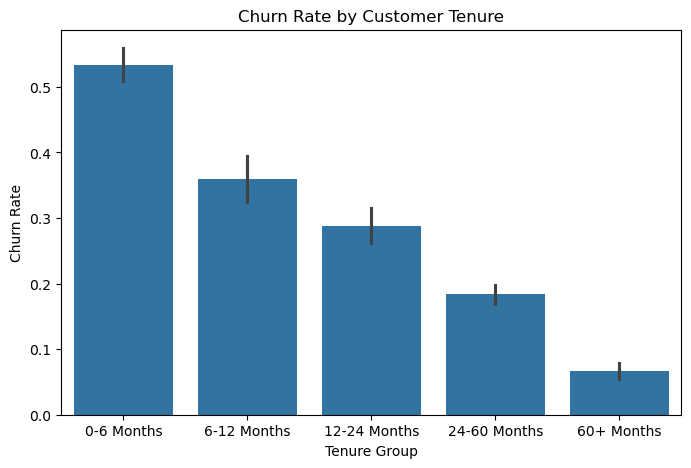

In [12]:
# Churn Rate by Customer Tenure Group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Tenure_Group", y="Churn_Value", estimator=np.mean)
plt.title("Churn Rate by Customer Tenure")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.show()

Insight:    
Customer churn is highest in the first 6 months and steadily declines with tenure, indicating early customer experience is the most critical retention window.

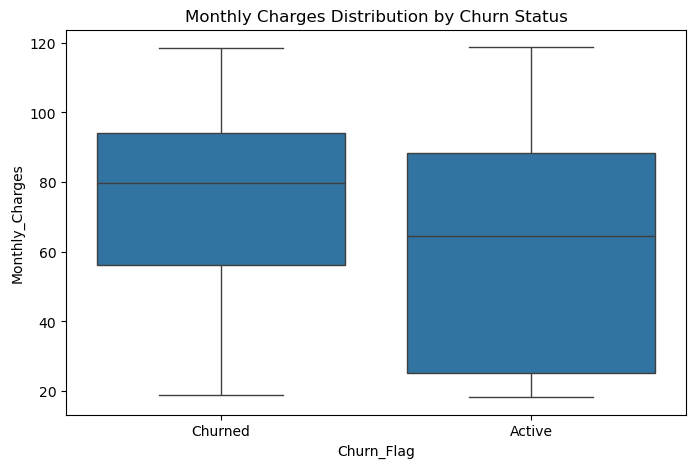

In [13]:
# Monthly Charges Distribution by Churn Status
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn_Flag", y="Monthly_Charges")
plt.title("Monthly Charges Distribution by Churn Status")
plt.show()

Insight:    
Churned customers have significantly higher monthly charges than active customers, highlighting strong price sensitivity as a key churn driver.

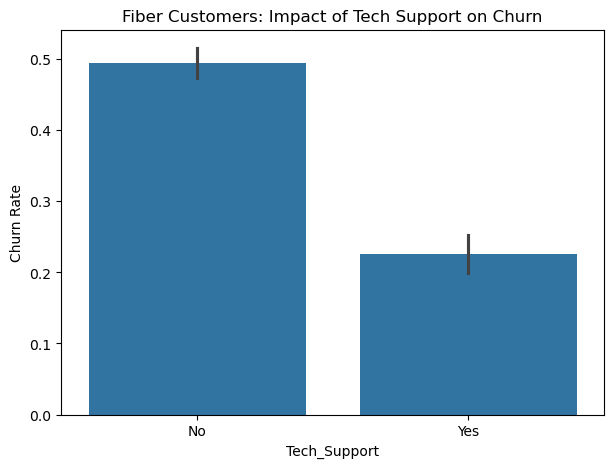

In [14]:
# Impact of Tech Support on Churn for Fiber Optic Customers
fiber_df = df[df["Internet_Service"] == "Fiber optic"]

# Plotting the impact of Tech Support on Churn for Fiber Optic Customers
plt.figure(figsize=(7,5))
sns.barplot(data=fiber_df, x="Tech_Support", y="Churn_Value", estimator=np.mean)
plt.title("Fiber Customers: Impact of Tech Support on Churn")
plt.ylabel("Churn Rate")
plt.show()

Insight:    
Fiber customers without tech support churn at more than double the rate of those with support, making tech support a high-impact retention lever.

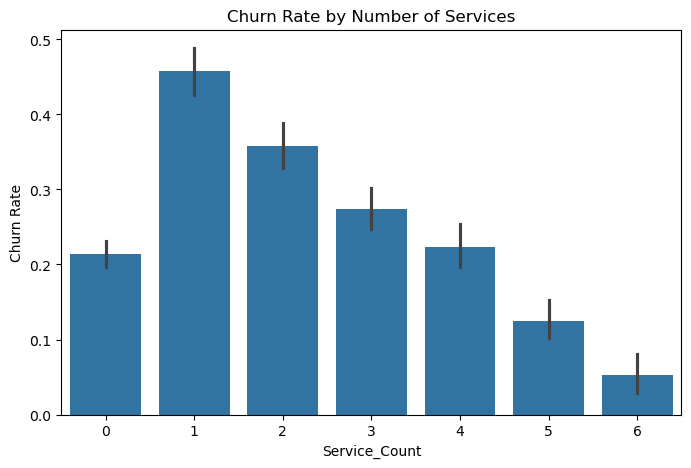

In [15]:
# Churn Rate by Number of Services Subscribed
service_cols = [
    "Online_Security", "Online_Backup", "Device_Protection",
    "Tech_Support", "Streaming_TV", "Streaming_Movies"
]

# Calculate the number of services each customer is subscribed to
df["Service_Count"] = df[service_cols].apply(
    lambda x: (x == "Yes").sum(), axis=1
)

# Plotting Churn Rate by Number of Services Subscribed
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Service_Count", y="Churn_Value", estimator=np.mean)
plt.title("Churn Rate by Number of Services")
plt.ylabel("Churn Rate")
plt.show()

Insight:    
Churn decreases consistently as customers subscribe to more services, confirming that service bundling increases customer stickiness.

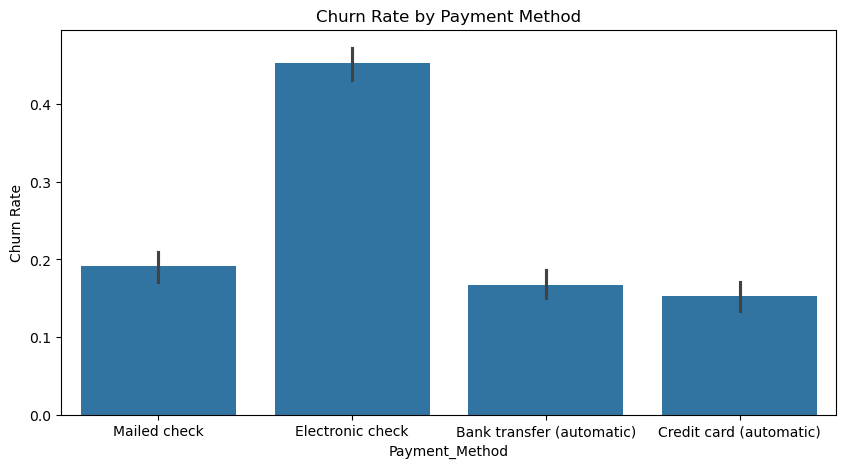

In [16]:
# Churn Rate by Payment Method
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Payment_Method", y="Churn_Value", estimator=np.mean)
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.show()

Insight:   
Customers using electronic checks show the highest churn rates, while automatic payment users are significantly more loyal.

### Revenue at Risk Analysis

In [17]:
revenue_lost = df[df["Churn_Value"] == 1]["Monthly_Charges"].sum()
revenue_lost

np.float64(139130.85)

In [18]:
### Revenue at Risk Analysis
pivot_rev = df[df["Churn_Value"] == 1].pivot_table(
    values="Monthly_Charges",
    index="Contract",
    columns="Revenue_Segment",
    aggfunc="sum"
)

pivot_rev

Revenue_Segment,Low,Medium,High,Very High
Contract,,,,
Month-to-month,4379.1,21716.20,50143.70,44608.10
One year,282.6,1855.25,2343.05,9637.55
Two year,113.5,398.80,394.90,3258.10


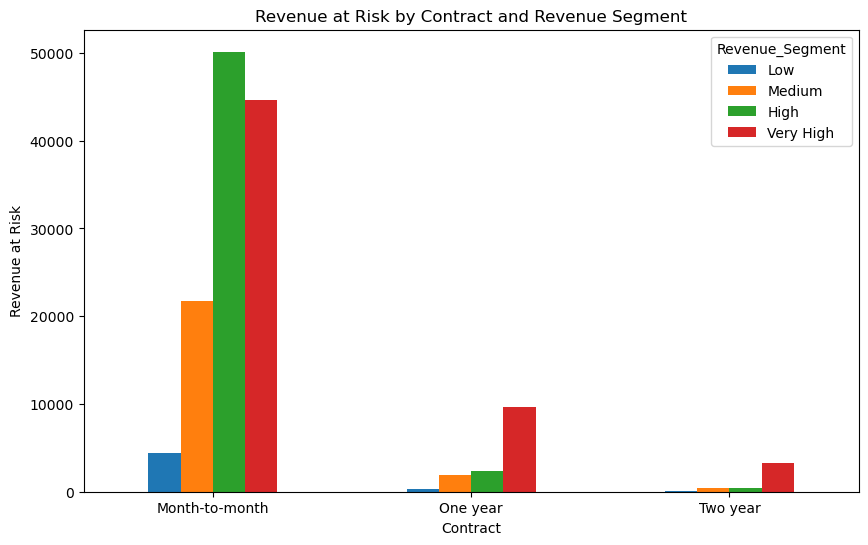

In [19]:
# Plotting Revenue at Risk by Contract and Revenue Segment
plt.figure(figsize=(10,6))
pivot_rev.plot(kind='bar', ax=plt.gca())
plt.title("Revenue at Risk by Contract and Revenue Segment")
plt.ylabel("Revenue at Risk")
plt.xticks(rotation=0)
plt.show()

Insight:    
Most revenue loss comes from high-value, month-to-month customers, indicating retention efforts should prioritize contract migration for premium segments.

In [20]:
# Top 10 Churn Reasons
df[df["Churn_Value"] == 1]["Churn_Reason"].value_counts().head(10)

Churn_Reason
Attitude of support person\r                   192
Competitor offered higher download speeds\r    189
Competitor offered more data\r                 162
Don't know\r                                   154
Competitor made better offer\r                 140
Attitude of service provider\r                 135
Competitor had better devices\r                130
Network reliability\r                          103
Product dissatisfaction\r                      102
Price too high\r                                98
Name: count, dtype: int64